# Introduction

Data science enables businesses to process huge amounts of structured and unstructured big data to detect patterns. This in turn allows companies to increase efficiencies, manage costs, identify new market opportunities, and boost their market advantage.

In our turn to present these features of Data science , we create this project that specify all Data Science cycles. 

### 1. Data Collection

We got this data from the UK government website.The UK government collects and publishes (usually on an annual basis) detailed information about traffic accidents across the country. 

This information includes, but is not limited to, geographical locations, weather conditions, number of casualties and vehicle manoeuvres, making this a very interesting and comprehensive dataset for analysis and research.

#### Our data is (accidentInformation.csv): 
#### Every line in the file represents a unique traffic accident (identified by the AccidentIndex column), featuring various properties related to the accident as columns. 
#### Date range: 2005-2017 

Data exists to support analysis that feedback the government with best solutions for decreasing accidents 

Data is included under the Local Data. We imported it as a CSV file.We don't handel it through cloud or data base so it is local stored. 

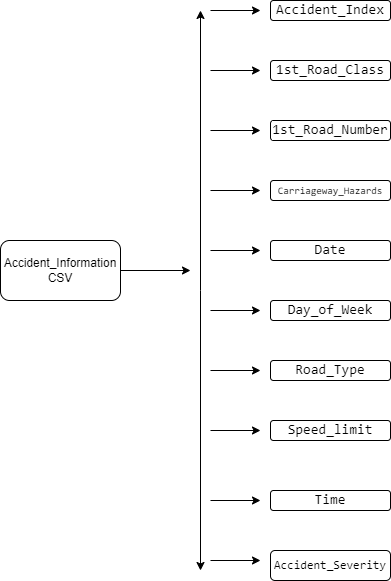

The previous structure shows the csv file and some of its columns. We will go deeply through columns details in the data exploratory.

### 2. Data Preparation and Exploration

#### We will start this stage by Importing the packages that we need to make the whole process and the next processes.
###### ...In general we import all pckages in the first of notebooks to let the rest of code works without any import.

- Numpy :Using this package to work with arrays including:
   - Arrangement
   - Calculations (like : Multiplication)
   - Sorting and specify every col and row properties 
   
- Pandas :Using pandas package to:
   - Arrange data input/output from local or non local storage.
   - Convert data from any shape to be dataframe that is suitable to be handeled and passed to any pipline process
   
- Matplotlib:Using it for visualizing data and explore it.

- Sklearn : Using sklearn to:

   - Encoding process with categorical data 
   - Split data into training and validation
   - Implementing ML models

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import re 
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

###### Reading Data from CSV as a Dataframe using Pandas that was imported as (alias) pd:

In [2]:
Accident_df = pd.read_csv('Accident_Information.csv',low_memory=False)

##### Checking for duplicates on the data and it found nothing

In [3]:
Accident_df.duplicated().sum()

0

##### Info method on DataFrame provide :
  - Number of records on the dataframe
  - Type of data per every Column

In [4]:
Accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   1st_Road_Class                               object 
 2   1st_Road_Number                              float64
 3   2nd_Road_Class                               object 
 4   2nd_Road_Number                              float64
 5   Accident_Severity                            object 
 6   Carriageway_Hazards                          object 
 7   Date                                         object 
 8   Day_of_Week                                  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64
 10  Junction_Control                             object 
 11  Junction_Detail                              object 
 12  Latitude                                     float64
 13  Light_Condit

##### Adding Date Column to Time Column and convert them to data_time type 
##### Extarct Hour and Min from Date_time Column by applying (hour,minute) methods

In [5]:
Accident_df['Date_Time'] = Accident_df['Date']+" "+Accident_df['Time']
Accident_df['Date_Time_edited'] = pd.to_datetime(Accident_df['Date_Time'],format="%Y-%m-%d %H:%M")
Accident_df['acc_hour']=Accident_df['Date_Time_edited'].dt.hour
Accident_df['acc_min'] =Accident_df['Date_Time_edited'].dt.minute

#### Explore data to check which label will be taken for applying Machine learning model


###### getting unique values of (Accident_Severity) Column then we will try to get the relations with another columns.

In [6]:
Accident_df['Accident_Severity'].unique()

array(['Serious', 'Slight', 'Fatal'], dtype=object)

- It contains three values as the previous cell 

##### Trying to plot the relationship between number of accidents per every category

In [7]:
x = Accident_df.groupby(['Accident_Severity']).count()['Accident_Index'].index
y = Accident_df.groupby(['Accident_Severity']).count()['Accident_Index'].values

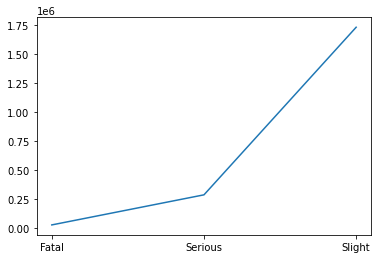

In [8]:
plt.plot(x,y)
plt.show()

##### From the previous plot :
- Number of slight accidents is the biggest number. 
- But we can explore deeply to get more accurate insight using Counter plot in the next cell 

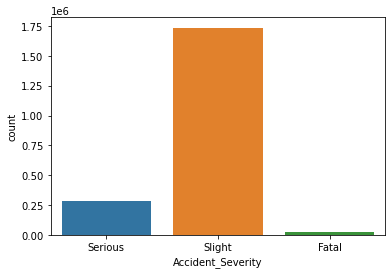

In [9]:
sns.countplot(x="Accident_Severity", data=Accident_df)
plt.show()

- Again we maked sure and get that Fetal is so little 
- More information we get now that our data through this column is imbalnced 
- Choosing severity as a label will cause biasing through slight type and here the challange 

#### Explore more about number of accidents and its relations with other features  

- Grouping accidents with CarriageWay_Hazards

In [10]:
Accident_df.groupby(['Carriageway_Hazards']).count()['Accident_Index']

Carriageway_Hazards
Any animal in carriageway (except ridden horse)      10416
Data missing or out of range                          2746
None                                               2007807
Other object on road                                 16111
Pedestrian in carriageway - not injured               4684
Previous accident                                     3105
Vehicle load on road                                  2387
Name: Accident_Index, dtype: int64

- Most accidents happen in the none hazrd situation 

- Grouping Number of Accidents with Day of Week and plot to get more accurate insight about that 

In [11]:
Accident_df.groupby(['Day_of_Week']).count()['Accident_Index']

Day_of_Week
Friday       335183
Monday       290482
Saturday     273152
Sunday       225327
Thursday     308240
Tuesday      306292
Wednesday    308580
Name: Accident_Index, dtype: int64

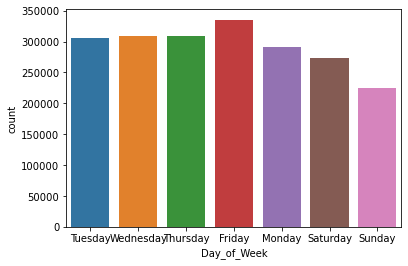

In [12]:
sns.countplot(x="Day_of_Week", data=Accident_df)
plt.show()

- Here we find That number of accidents is so high in Friday 
- The lowest two days of accidents are (Staurday_Sunday)on holiday

- Grouping accidents by Hour and min to get more insight about the interval that most acciendents happen

In [13]:
x_time_hour    = Accident_df.groupby(['acc_hour']).count()['Accident_Index'].index
acc_count_hour = Accident_df.groupby(['acc_hour']).count()['Accident_Index'].values
x_time_min     = Accident_df.groupby(['acc_min']).count()['Accident_Index'].index
acc_count_min  = Accident_df.groupby(['acc_min']).count()['Accident_Index'].values

In [14]:
Accident_df.groupby(['acc_hour']).count()['Accident_Index'] # 11.0 to 19.0

acc_hour
0.0      31077
1.0      22746
2.0      18036
3.0      14648
4.0      11400
5.0      16861
6.0      36591
7.0      86904
8.0     149480
9.0     101223
10.0     92494
11.0    105685
12.0    120279
13.0    123497
14.0    124227
15.0    158028
16.0    166024
17.0    181881
18.0    142417
19.0    106202
20.0     77981
21.0     62229
22.0     54211
23.0     42979
Name: Accident_Index, dtype: int64

In [37]:
Accident_df['Road_Type'].value_counts()

Single carriageway              1527882
Dual carriageway                 303407
Roundabout                       136754
One way street                    43258
Slip road                         21558
Unknown                           14396
Data missing or out of range          1
Name: Road_Type, dtype: int64

In [38]:
Accident_df['Weather_Conditions'].value_counts()

Fine no high winds              1640095
Raining no high winds            239281
Other                             44083
Unknown                           42521
Raining + high winds              28343
Fine + high winds                 25816
Snowing no high winds             13387
Fog or mist                       11068
Snowing + high winds               2487
Data missing or out of range        175
Name: Weather_Conditions, dtype: int64

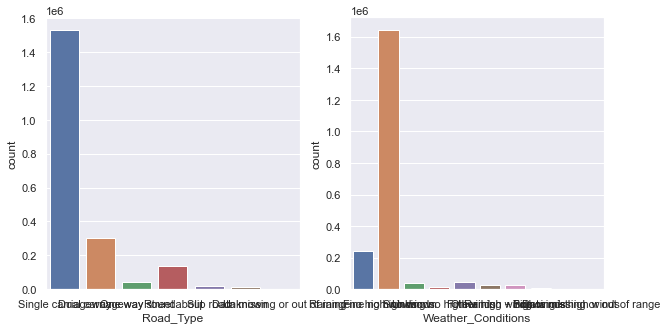

In [28]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x="Road_Type", data=Accident_df)
plt.subplot(1,2,2)
sns.countplot(x="Weather_Conditions", data=Accident_df)
plt.show()

C:\Users\chica\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chica\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


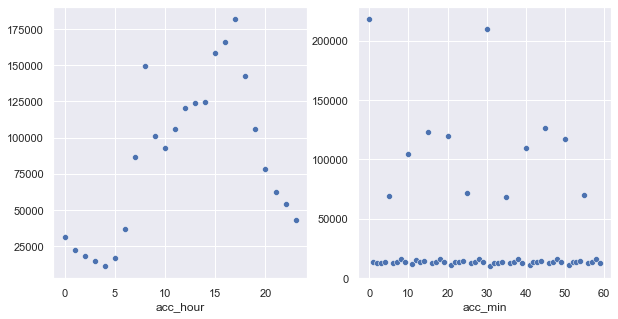

In [15]:
sns.set()
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.scatterplot(x_time_hour,acc_count_hour)
plt.subplot(1,2,2)
sns.scatterplot(x_time_min,acc_count_min)
plt.show()

- From the previous graphs most of accidents happen between (11 am ) to (7 pm)  

# Prepare data For Applying Machine learning models:
- Choosing label and Features of data is the first step for this process.
- Lable is Accident_Severity column and the rest of columns are the features.
- Problem, model understand numbers only and we have categorical data that should be converted into numbers.
- Overcome this problems by Using Encoding methods.
- Encoding means that you map each category into unique number or indicate its existing through features.
- There are several types of Encoding but we will use only two types:
   - one hot encoding
   - Label encoding

- Starting by extartct the most suitable features for predection. 
After looking on the data and making our exploration we explore that there are some useful features that related to the number of accidents 
- saving them on the coloums variable and passing it to the original dataframe to slice the it. 

In [24]:
coloums=['Accident_Severity','Carriageway_Hazards','acc_hour','acc_min','Day_of_Week','Number_of_Casualties','Number_of_Vehicles','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Road_Surface_Conditions','Road_Type','Special_Conditions_at_Site','Speed_limit','Urban_or_Rural_Area','Weather_Conditions']
acc_main_df = Accident_df[coloums]

- Checking Nan values and duplicates then removing them 

In [26]:
print("Nan values = ",acc_main_df.isna().sum().values.sum())
print("duplicated values = ",acc_main_df.duplicated().sum())
acc_main_df.dropna(inplace=True)
acc_main_df.drop_duplicates(inplace=True)

Nan values =  6829
duplicated values =  946727


<ipython-input-26-d1642d3f025a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_main_df.dropna(inplace=True)
<ipython-input-26-d1642d3f025a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_main_df.drop_duplicates(inplace=True)


- Checking unique values for (Road Type) and (Weather conditions).

In [27]:
print(acc_main_df['Road_Type'].unique())
print(acc_main_df['Weather_Conditions'].unique())

['Single carriageway' 'Dual carriageway' 'One way street' 'Roundabout'
 'Slip road' 'Unknown']
['Raining no high winds' 'Fine no high winds' 'Unknown'
 'Snowing no high winds' 'Other' 'Fine + high winds'
 'Raining + high winds' 'Fog or mist' 'Snowing + high winds'
 'Data missing or out of range']


- From the expoloration part we found that unknown values for the (Road_type , Weather_conditions) takes some weight for the number of accidents.
- One of the solutions is removing them.
- In the next cell we will removing them and try without them.

In [39]:
acc_main_df = acc_main_df.loc[acc_main_df['Road_Type'] != 'Unknown']
acc_main_df = acc_main_df.loc[acc_main_df['Weather_Conditions'] != 'Unknown']
print(acc_main_df['Road_Type'].unique())
print(acc_main_df['Weather_Conditions'].unique())

['Single carriageway' 'Dual carriageway' 'One way street' 'Roundabout'
 'Slip road']
['Raining no high winds' 'Fine no high winds' 'Snowing no high winds'
 'Other' 'Fine + high winds' 'Raining + high winds' 'Fog or mist'
 'Snowing + high winds' 'Data missing or out of range']


- Problem , after converting categorical into numirical , columns names will be changed so we try to get the original names to modify dataframe with the new names.
- In the nex cell , we extract names of categorical or object columns and not to be handeled later.
- Save label (Target column) in a variable to be encoded later then drop it.

In [40]:
object_cols = [col for col in acc_main_df.columns if acc_main_df[col].dtype == 'O']
non_object_cols = [col for col in acc_main_df.columns if acc_main_df[col].dtype != 'O']

Target_label = acc_main_df['Accident_Severity']
acc_main_df.drop(['Accident_Severity','Special_Conditions_at_Site','Carriageway_Hazards'],axis = 1,inplace= True)#Carriageway_Hazards
object_cols = [col for col in acc_main_df.columns if acc_main_df[col].dtype == 'O']


acc_object_df=acc_main_df[object_cols]  # For oneHotencoding operation


- Initiate object from One_Hot Encoder class to be used in Encoding 
- But,There is a trick here we will use (get_dummies) on data frame then add column names from One_hot Encoding after handeling it using Regular_Expression that are imported as (re).
- You will see the output of One_hot Encoding before handeling columns names and after.

In [43]:
enc = OneHotEncoder()
enc.fit(acc_object_df)
print("Columns names after Encoding and before handeling :")
print(enc.get_feature_names())

Columns names after Encoding and before handeling :
['x0_Friday' 'x0_Monday' 'x0_Saturday' 'x0_Sunday' 'x0_Thursday'
 'x0_Tuesday' 'x0_Wednesday' 'x1_Data missing or out of range' 'x1_Dry'
 'x1_Flood over 3cm. deep' 'x1_Frost or ice' 'x1_Snow' 'x1_Wet or damp'
 'x2_Dual carriageway' 'x2_One way street' 'x2_Roundabout'
 'x2_Single carriageway' 'x2_Slip road' 'x3_Rural' 'x3_Unallocated'
 'x3_Urban' 'x4_Data missing or out of range' 'x4_Fine + high winds'
 'x4_Fine no high winds' 'x4_Fog or mist' 'x4_Other'
 'x4_Raining + high winds' 'x4_Raining no high winds'
 'x4_Snowing + high winds' 'x4_Snowing no high winds']


C:\Users\chica\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [44]:
coloums_names = [re.sub(r'^\w+\d_','',element) for element in enc.get_feature_names()] 
print("Columns names after handeling : ")
print(coloums_names)

Columns names after handeling : 
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Data missing or out of range', 'Dry', 'Flood over 3cm. deep', 'Frost or ice', 'Snow', 'Wet or damp', 'Dual carriageway', 'One way street', 'Roundabout', 'Single carriageway', 'Slip road', 'Rural', 'Unallocated', 'Urban', 'Data missing or out of range', 'Fine + high winds', 'Fine no high winds', 'Fog or mist', 'Other', 'Raining + high winds', 'Raining no high winds', 'Snowing + high winds', 'Snowing no high winds']


In [45]:
Temp_dummies=pd.get_dummies(acc_main_df,prefix=None)
added_to_list = list (Temp_dummies.columns[:7])
for col in coloums_names:
    added_to_list.append(col)
    
Temp_dummies.columns = added_to_list
Temp_dummies.shape

(1053683, 37)

- Applying label Encoding for target column(Label)

In [46]:
le = preprocessing.LabelEncoder()
target_encoded = le.fit_transform(Target_label)
Temp_dummies['Accident_Severity'] = target_encoded

In [47]:
target_map = {lab:le.transform([lab])[0] for lab in le.classes_}

- Here you can find how label encoding happens.
- It maps numeric value to every label 

In [49]:
target_map

{'Fatal': 0, 'Serious': 1, 'Slight': 2}

- Here We will apply mathemtical concept called ( Correlation ).
- In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. 
- In the broadest sense correlation is any statistical association, though it actually refers to the degree to which a pair of variables are linearly related.
- In the next cell , we will plot heat_map of correlation values between features and each other.
- value of correlation ranges from [-1:1] 
- Ideal case , correlation between features with each other should be zero and with target should be one.
- But, there is no existance for ideal case so we will try to simplify features with target as possibe.

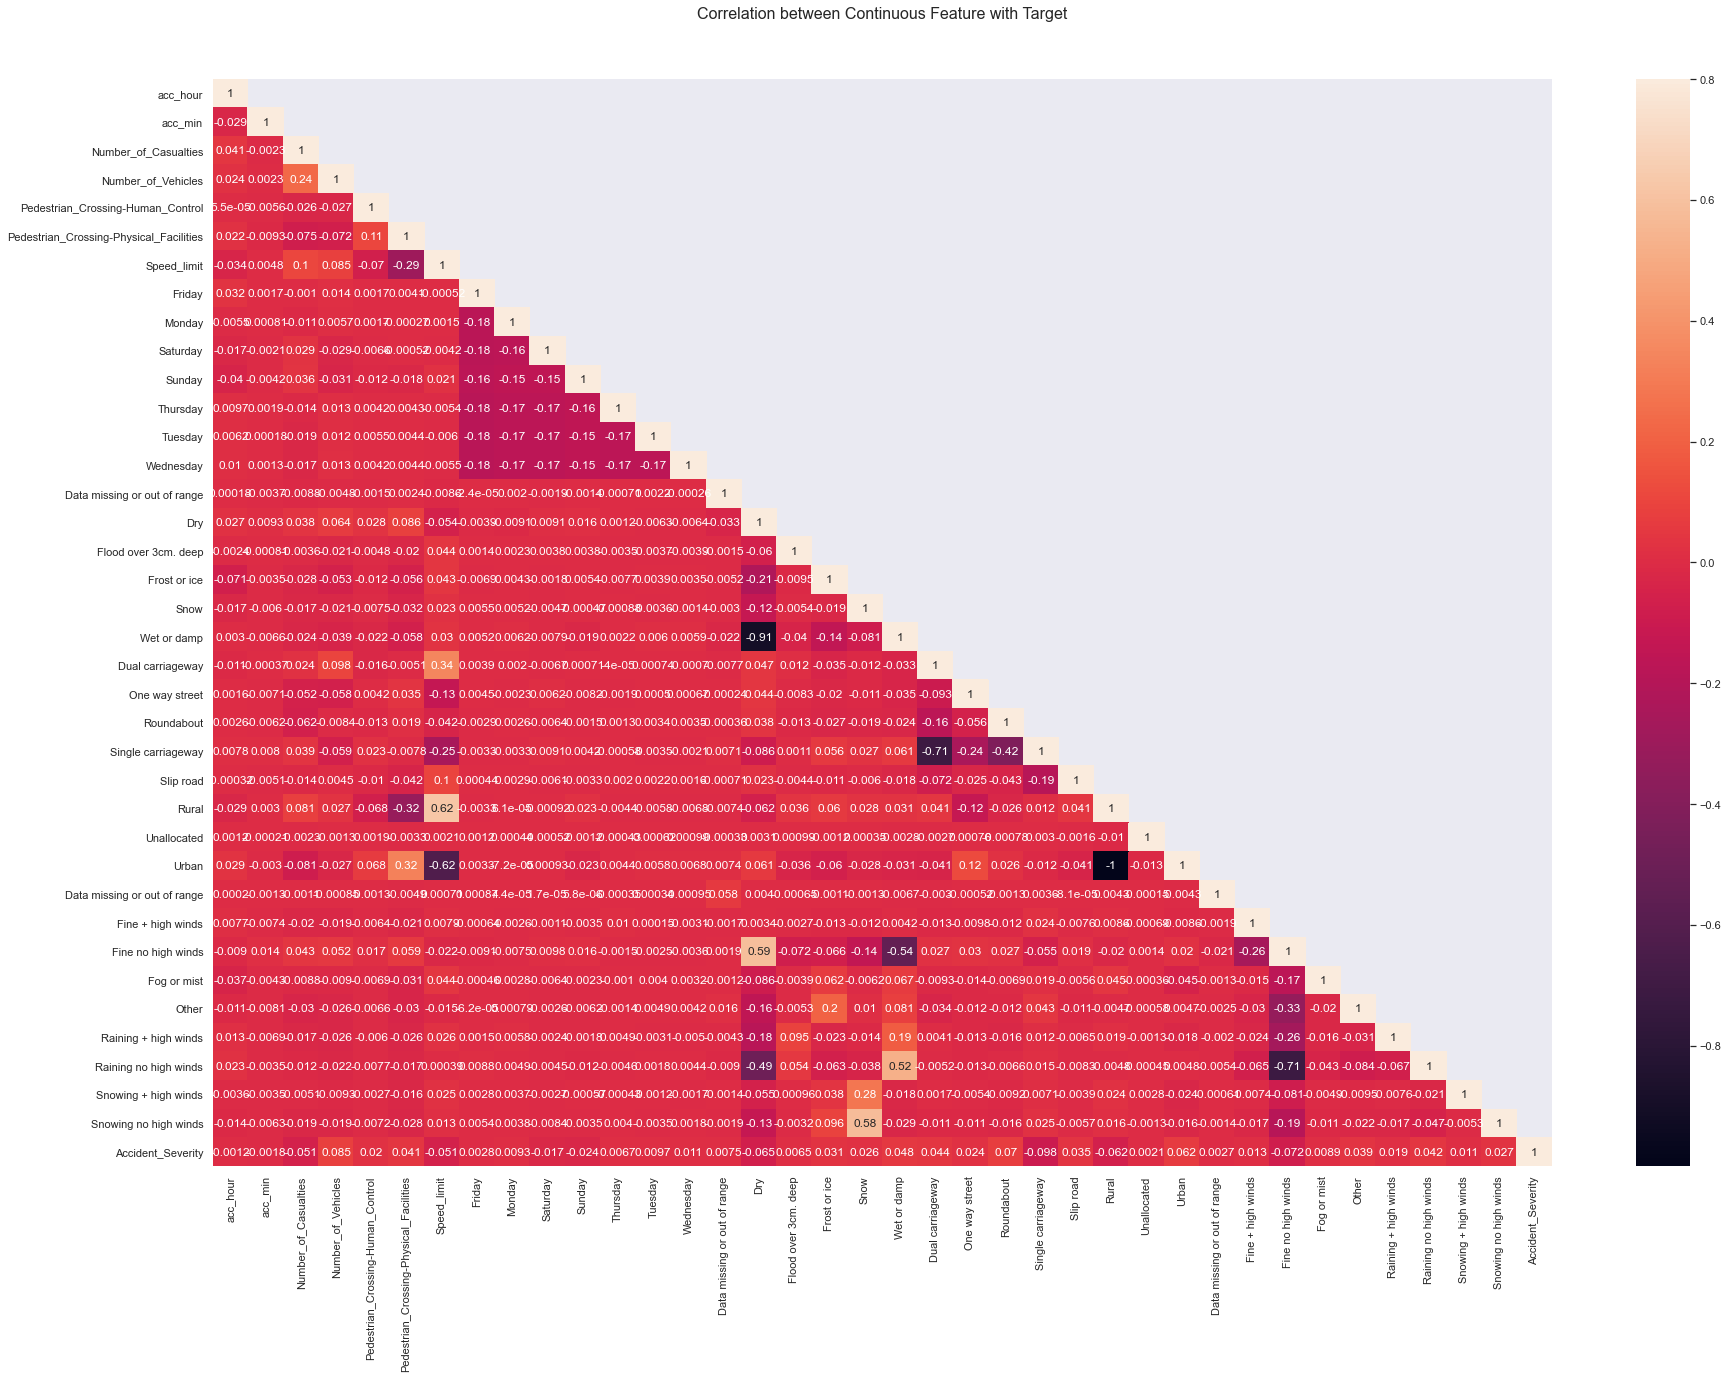

In [50]:
# calculate correlation matrix.
corrMatt = Temp_dummies.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(30,20)
g = sns.heatmap(corrMatt,mask=mask,vmax=.8,annot=True)#,vmax=.8, square=True,annot=True, 
g.set_title("Correlation between Continuous Feature with Target", fontsize=16, y=1.05)
plt.show()

- After analysing the heat map we found that we should drop those features from dataframe because their correlation with another features and target.

In [51]:
drop_list = ['Urban','Fine no high winds','Raining no high winds','Single carriageway','Wet or damp']
Temp_dummies.drop(drop_list,axis = 1,inplace=True)

- Splitting data into train and test data. 
- Splitting train into train and validation. 
- Splitting concept for validation and train is the major of how we control the model performance.

In [53]:
Label = Temp_dummies['Accident_Severity']
df_x  = Temp_dummies.drop('Accident_Severity',axis = 1)

In [54]:
X_train, X_test, Y_train, y_test = train_test_split(df_x,Label, test_size=0.2, random_state=42)
x_train, x_validate, y_train, y_validate = train_test_split(X_train,Y_train, test_size=0.2, random_state=42)

## Starting to apply ML Algorithms

- Firstly, our Problem here is a classification problem because our target value is a discrete values.
- Problem, having imblanced distribution of values through target column.
- Trying to use classifiers that can handel Imblance in data like (Random_Forest,SVM).
- Giving big weight for the label that has low weight in data, from exploration:
   - Weight('Fatal') < Weight('Serious') < Weight('Slight').
   - We will give reverse weights for the model while training process.

In [56]:
acc_main_df['Accident_Severity'] =Target_label
x = acc_main_df['Accident_Severity'].value_counts().index
y = acc_main_df['Accident_Severity'].value_counts().values
imbalnced_weights = {x[i]:(y[i]/acc_main_df.shape[0]) for i in range(len(x))}
imbalnced_weights

{'Slight': 0.7843098920643116,
 'Serious': 0.19195052022287537,
 'Fatal': 0.023739587712813058}

- From the previous result we get the actual weights for every label.
- We will reverse it and pass them to the model

In [57]:
balnced_weights = {0:0.8471007512437518, 1:0.14000603031210782, 2:0.012893218444140318}
balnced_weights

{0: 0.8471007512437518, 1: 0.14000603031210782, 2: 0.012893218444140318}

- Rondom forest classifer is based on decision tree algorithm.
- It runs several decision trees with different aspects then making vote between them and choose the best solution according to the voting.
- In the next cell, we creat an object from Rondom Forest class and adjust settitngs of it as needed .
- Passing the criterion of stopping searching for trees according to ('Entoropy') not gini.
- Entropy reverses how much information gained. 
- Then passing balanced weights as we configured before.

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy',class_weight=balnced_weights, random_state=42)
clf.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.8471007512437518,
                                     1: 0.14000603031210782,
                                     2: 0.012893218444140318},
                       criterion='entropy', random_state=42)

- Fitting Data means that we let the model to understand the relation between features and target.
- After fitting we will do our test on the validation data to make sure that we are doing well. 
- Then print calssification report by compare between actual data and predicted data.

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
classes = Accident_df['Accident_Severity'].unique().tolist()
y_validate_predict  = clf.predict(x_validate)
print(classification_report(y_validate, y_validate_predict,target_names = classes))

              precision    recall  f1-score   support

     Serious       0.02      0.01      0.01      3998
      Slight       0.15      0.12      0.13     32377
       Fatal       0.78      0.82      0.80    132215

    accuracy                           0.67    168590
   macro avg       0.32      0.32      0.32    168590
weighted avg       0.64      0.67      0.66    168590



- From the previous evaluation we get about 0.67 and this result is not desired 
- According to that we will try another technique to over come this result

In [64]:
conv_matrix = confusion_matrix(y_validate, y_validate_predict)

- Present confusion matrix to make sure of the result
- Confusion matrix is a specific table layout that allows visualization of the performance of an algorithm.

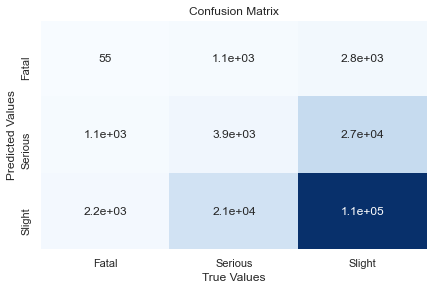

In [65]:
dataframe = pd.DataFrame(conv_matrix, index=['Fatal', 'Serious', 'Slight'], 
                         columns=['Fatal', 'Serious', 'Slight'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

#### Imbalnced label distribution makes a big trouble so we will try to over come this by up sample small weights of labels to be equal the big weights. 

- Calling SMOTE to over sample data after fitting features and target 

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
# view previous class distribution
print('Before Upsampling with SMOTE:'), print(acc_main_df['Accident_Severity'].value_counts())

fetures_array = np.array(x_train)
target_array  = np.array(y_train)
# resample data ONLY using training data
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(fetures_array,target_array) 

# view synthetic sample class distribution
#print('\nAfter Upsampling with SMOTE:'), print(pd.Series(y_resampled).value_counts())

Before Upsampling with SMOTE:
Slight     826414
Serious    202255
Fatal       25014
Name: Accident_Severity, dtype: int64


In [68]:
print("After Upsampling with SMOTE")
print(pd.Series(y_resampled).value_counts())

After Upsampling with SMOTE
2    529149
1    529149
0    529149
dtype: int64


### Trying random Forest classifier again after Upsampling again and display the same metrics.

In [69]:
x_train_resampled = pd.DataFrame(X_resampled,columns=x_train.columns)
y_train_resampled = pd.Series(y_resampled)

In [70]:
clf = RandomForestClassifier(criterion='entropy', random_state=42)
clf.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier(criterion='entropy', random_state=42)

In [71]:
y_validate_predict  = clf.predict(x_validate)
print(classification_report(y_validate, y_validate_predict,target_names = classes))

              precision    recall  f1-score   support

     Serious       0.03      0.01      0.02      3998
      Slight       0.13      0.09      0.11     32377
       Fatal       0.78      0.85      0.81    132215

    accuracy                           0.69    168590
   macro avg       0.31      0.32      0.31    168590
weighted avg       0.64      0.69      0.66    168590



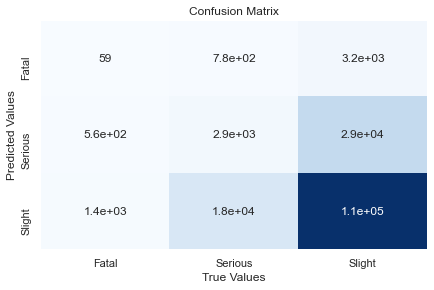

In [72]:
conv_matrix = confusion_matrix(y_validate, y_validate_predict)
dataframe = pd.DataFrame(conv_matrix, index=['Fatal', 'Serious', 'Slight'], 
                         columns=['Fatal', 'Serious', 'Slight'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_validate, y_validate_predict)

0.6871522628862922